In [13]:
# process job words and store their frequencies as dictionary
# job title visualization using wordcloud

import pandas as pd
from nltk.tokenize import word_tokenize

file_name = 'hidden'
data = pd.read_csv(file_name, low_memory = False)

In [14]:
title_string = ""
whole_word_list = []
cnt = 0

def extract_titles (title):
    global title_string, whole_word_list
    if title and title == title:
        title_string = title_string + title.lower() + " "
    global cnt; cnt = cnt + 1
    if cnt % 10000 == 0:
        # print(cnt)
        whole_word_list = whole_word_list + word_tokenize(title_string)
        title_string = ""


In [15]:
data['title'].apply(extract_titles)

0          None
1          None
2          None
3          None
4          None
           ... 
2311602    None
2311603    None
2311604    None
2311605    None
2311606    None
Name: title, Length: 2311607, dtype: object

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gaeun\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
from nltk.tokenize import RegexpTokenizer

retokenize = RegexpTokenizer("[\w]+")
re_list = retokenize.tokenize(title_string)

In [18]:
symbol_list = set([x for x in whole_word_list if x not in re_list])   # temp_list - word_list

real_symbol_list = []
for word in symbol_list:
    if len(word) == 1:
        real_symbol_list.append(word)

print(real_symbol_list)

# real_symbol_list = ['\x96', '{', '✔', '„', '₿', '🍃', 'k', '®', 'и', '0', '«', ';', '∙', '“', 'f', '‐', '➣', '^', '★', '➢', ',', '6', '\u200b', '#', '/', '’', '\u200d', '—', '♛', '7', '🤫', 'à', '}', '@', '·', '<', 'á', 'u', '?', '∞', "'", '♦', '➟', 'g', '»', '8', '!', '•', '™', '1', '3', '−', '\uf8ff', '%', 'z', ':', '*', '[', '⇉', '4', '\u202c', '🥷', '=', '⇒', 'h', '+', '(', '●', '↔', '\\', '\u200e', 'ר', '🔎', '➲', '&', '►', 'i', '”', 'в', '‘', '§', '◆', 'y', '◊', '>', '│', ']', '9', '~', 'j', 'b', 'n', '✦', '|', 'o', ')', '＆', 'l', '.', '¦', '`', '$', '–', 'ι', '-', 'ⓦ', 'w', '\x03', 'q', '\xad', '5', '_']

['\x96', '{', '✔', '„', '₿', '🍃', 'k', '®', 'и', '0', '«', ';', '∙', '“', 'f', '‐', '➣', '^', '★', '➢', ',', '6', '\u200b', '#', '/', '’', '\u200d', '—', '♛', '7', '🤫', 'à', '}', '@', '·', '<', 'á', 'u', '?', '∞', "'", '♦', '➟', 'g', '»', '8', '!', '•', '™', '1', '3', '−', '\uf8ff', '%', 'z', ':', '*', '[', '⇉', '4', '\u202c', '🥷', '=', '⇒', 'h', '+', '(', '●', '↔', '\\', '\u200e', 'ר', '🔎', '➲', '&', '►', 'i', '”', 'в', '‘', '§', '◆', 'y', '◊', '>', '│', ']', '9', '~', 'j', 'b', 'n', '✦', '|', 'o', ')', '＆', 'l', '.', '¦', '`', '$', '–', 'ι', '-', 'ⓦ', 'w', '\x03', 'q', '\xad', '5', '_']


In [19]:
from os import remove
from nltk.corpus import stopwords

word_list = []
stop_words = set(stopwords.words('english'))
for word in whole_word_list:
    if word not in stop_words and word not in real_symbol_list:
        word_list.append(word)

In [20]:
import collections

word_count = dict(collections.Counter(word_list))

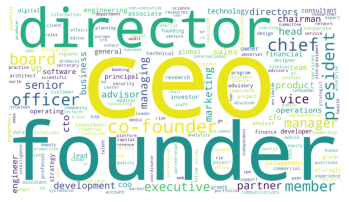

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

cloud = WordCloud(width=1600, height=900, background_color="white", random_state=0)
plt.imshow(cloud.generate_from_frequencies(word_count))
plt.axis("off")
plt.show()
cloud.to_file('wordcloud_title_whole.png')

In [22]:
import pickle
import operator

with open('data_dict.pkl','wb') as f:
    pickle.dump(sorted(word_count.items(), key=operator.itemgetter(1), reverse=True), f)

In [23]:
print(sorted(word_count.items(), key=operator.itemgetter(1), reverse=True))

[('ceo', 304880), ('founder', 303099), ('director', 279959), ('co-founder', 256624), ('chief', 213854), ('president', 204681), ('officer', 201317), ('board', 183150), ('member', 156094), ('manager', 118177), ('executive', 109080), ('vice', 104465), ('senior', 86105), ('partner', 79705), ('managing', 79134), ('marketing', 71307), ('vp', 67640), ('cto', 67366), ('head', 66412), ('development', 61951), ('advisor', 61064), ('product', 60952), ('directors', 58552), ('chairman', 56653), ('business', 56186), ('sales', 47564), ('engineer', 44457), ('coo', 40139), ('operations', 37895), ('team', 35620), ('cfo', 34537), ('technology', 34519), ('software', 32851), ('financial', 32214), ('general', 30336), ('engineering', 29857), ('owner', 25526), ('global', 25253), ('principal', 24678), ('lead', 24360), ('associate', 23927), ('operating', 23883), ('management', 23572), ('consultant', 22650), ('strategy', 22514), ('developer', 22437), ('investor', 21147), ('advisory', 17293), ('research', 16834), 